In [1]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_stacked_errors_by_date(df):
    """
    Creates a stacked bar chart of error types by string-formatted date.

    Parameters:
    - df: Pandas DataFrame with 'created' (string) and 'error_type' (categorical string)
    """
    # Group and count errors by 'created' date and 'error_type'
    grouped = df.groupby(['created', 'error_type_str']).size().unstack(fill_value=0)

    # Sort rows and columns for consistent plotting
    grouped = grouped.sort_index(axis=0).sort_index(axis=1)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))

    bottom = None
    colors = plt.cm.tab20.colors  # Up to 20 distinct colors
    error_types = grouped.columns.tolist()

    for i, error_type in enumerate(error_types):
        counts = grouped[error_type]
        ax.bar(grouped.index, counts, bottom=bottom, 
               label=error_type, color=colors[i % len(colors)])
        bottom = counts if bottom is None else bottom + counts

    ax.set_xlabel("Date")
    ax.set_ylabel("Error Count")
    ax.set_title("Stacked Error Types by Date")
    ax.legend(title="Error Type", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_stacked_errors_with_percent_legend_by_annotator_id(df):
    """
    Plots a stacked bar chart of error types by date string.
    Adds count and percentage in the legend for each error_type.

    Parameters:
    - df: Pandas DataFrame with 'created' and 'error_type' columns (both as strings)
    """
    # Group and count errors
    grouped = df.groupby(['labeler_id', 'error_type_str']).size().unstack(fill_value=0)
    grouped = grouped.sort_index(axis=0).sort_index(axis=1)

    # Total number of errors (all types)
    total_samples = grouped.sum().sum()

    # Plot setup
    fig, ax = plt.subplots(figsize=(10, 6))
    bottom = [0] * len(grouped)
    colors = plt.cm.tab20.colors
    error_types = grouped.columns.tolist()

    for i, error_type in enumerate(error_types):
        counts = grouped[error_type]
        total_for_type = counts.sum()
        percent = (total_for_type / total_samples) * 100

        label = f"{error_type} ({total_for_type}, {percent:.1f}%)"

        ax.bar(grouped.index, counts, bottom=bottom,
               label=label, color=colors[i % len(colors)])

        # Update bottom for next stack
        bottom = [btm + val for btm, val in zip(bottom, counts)]

    # Labels and formatting
    ax.set_xlabel("Annotator")
    ax.set_ylabel("Error Count")
    ax.set_title("Stacked Error Types by Annotator")
    ax.legend(title="Error Type (Count, % of total)", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_stacked_errors_with_percent_legend(df):
    """
    Plots a stacked bar chart of error types by date string.
    Adds count and percentage in the legend for each error_type.

    Parameters:
    - df: Pandas DataFrame with 'created' and 'error_type' columns (both as strings)
    """
    # Group and count errors
    grouped = df.groupby(['created', 'error_type_str']).size().unstack(fill_value=0)
    grouped = grouped.sort_index(axis=0).sort_index(axis=1)

    # Total number of errors (all types)
    total_samples = grouped.sum().sum()

    # Plot setup
    fig, ax = plt.subplots(figsize=(10, 6))
    bottom = [0] * len(grouped)
    colors = plt.cm.tab20.colors
    error_types = grouped.columns.tolist()

    for i, error_type in enumerate(error_types):
        counts = grouped[error_type]
        total_for_type = counts.sum()
        percent = (total_for_type / total_samples) * 100

        label = f"{error_type} ({total_for_type}, {percent:.1f}%)"

        ax.bar(grouped.index, counts, bottom=bottom,
               label=label, color=colors[i % len(colors)])

        # Update bottom for next stack
        bottom = [btm + val for btm, val in zip(bottom, counts)]

    # Labels and formatting
    ax.set_xlabel("Date")
    ax.set_ylabel("Error Count")
    ax.set_title("Stacked Error Types by Date")
    ax.legend(title="Error Type (Count, % of total)", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def summarize_categorical_columns(df, columns):
    """
    Prints a summary table of unique values, counts, and percentages for given categorical columns.

    Parameters:
    - df: pandas DataFrame
    - columns: list of column names to summarize
    """
    for col in columns:
        print(f"\nColumn: {col}")
        print("-" * (len(col) + 9))
        counts = df[col].value_counts(dropna=False)
        percentages = df[col].value_counts(normalize=True, dropna=False) * 100

        summary = pd.DataFrame({
            'Value': counts.index.astype(str),
            'Count': counts.values,
            'Percentage': percentages.values
        })

        # Format percentage column
        summary['Percentage'] = summary['Percentage'].map("{:.2f}%".format)

        # Print as text table
        print(summary.to_string(index=False))

# Error Characterizer
Enter the number corresponding to the type of error

0. No Error
1. Uncentered Box
2. Severely Uncentered Box
3. Missed Target
4. Blank Box
5. Silt Transpose Error
6. Occlusion [Edge or star]
7. Other
8. Unknown
9. Long Satellite Streak

 36%|███▌      | 162/455 [16:25<1:15:03, 15.37s/it]

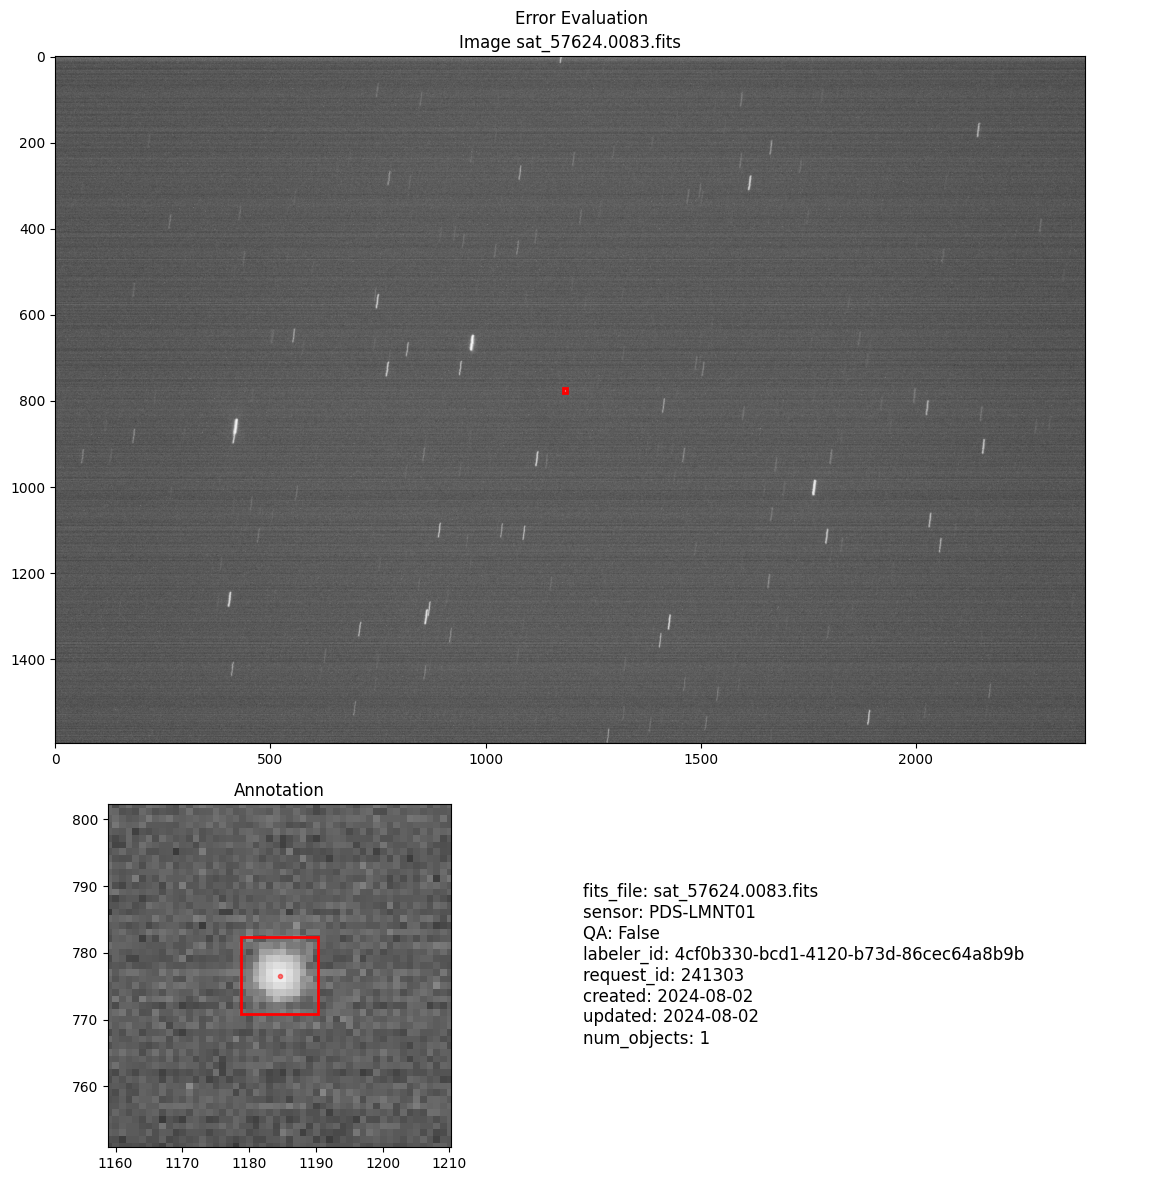

In [ ]:
from pandas_statistics import file_path_loader, PDStatistics_calculator

### BOUNDING BOXES SLIGHTLY OUT OF BOUNDS FIX TOMORROW MORNING

directory = "/data/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-07-09"
local_files = file_path_loader(directory)
local_files.characterize_errors()

Index(['fits_file', 'sensor', 'QA', 'labeler_id', 'request_id', 'created',
       'updated', 'num_objects', 'error_type', 'error_type_str'],
      dtype='object')

Column: QA
-----------
Value  Count Percentage
False    560     93.80%
 True     37      6.20%

Column: error_type_str
-----------------------
                Value  Count Percentage
             No Error    554     92.80%
              Unknown     14      2.35%
Long Satellite Streak     13      2.18%
            Blank Box     11      1.84%
                Other      4      0.67%
        Missed Target      1      0.17%

Column: created
----------------
     Value  Count Percentage
2025-06-04    597    100.00%


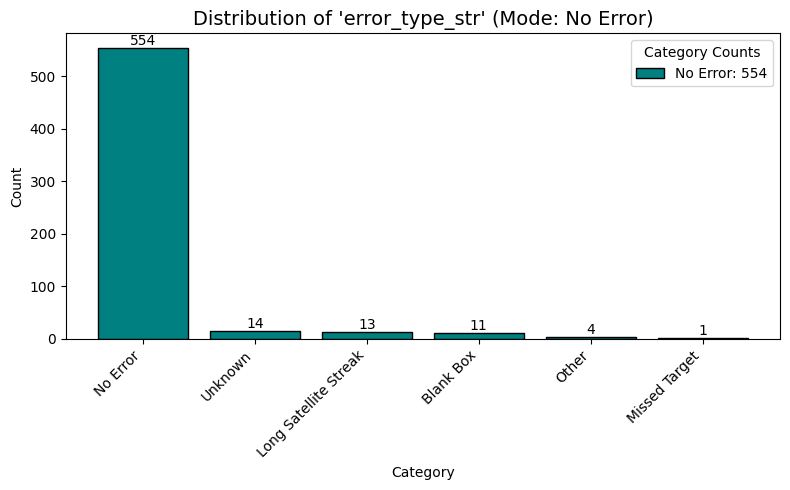

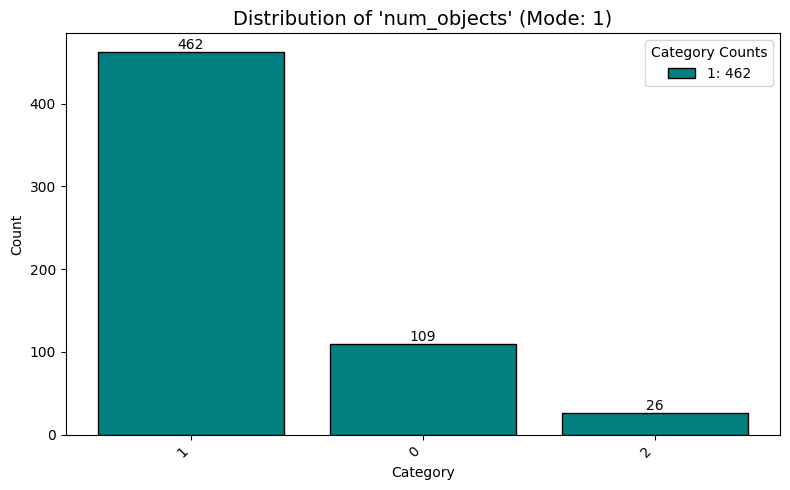

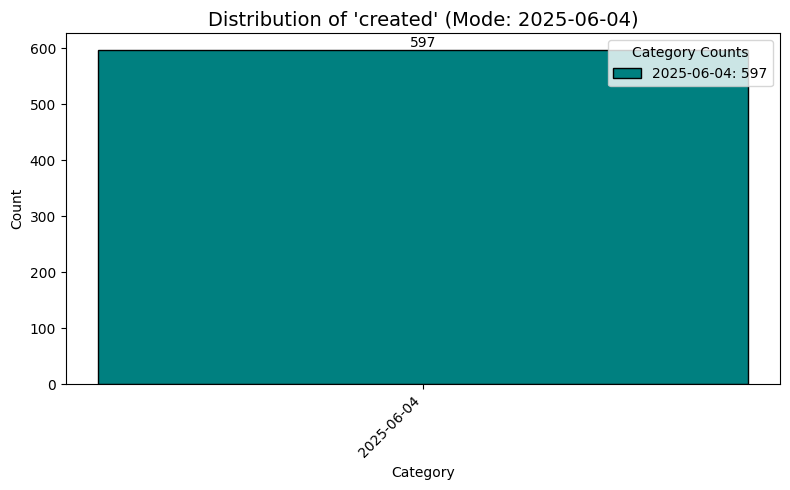

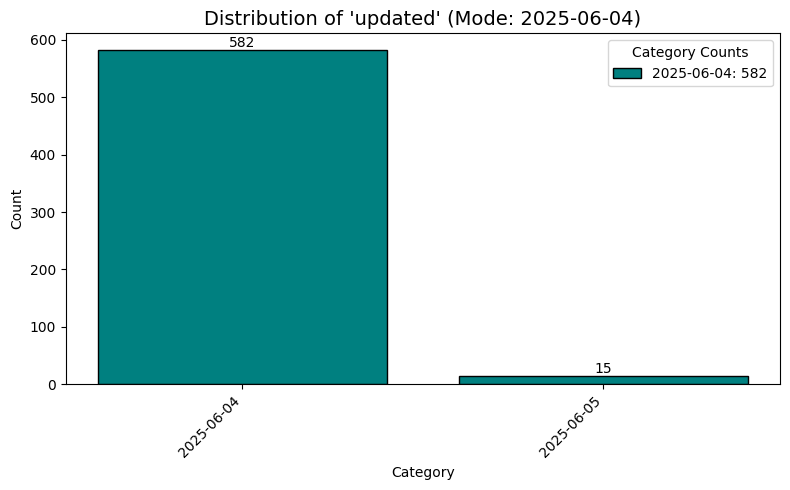

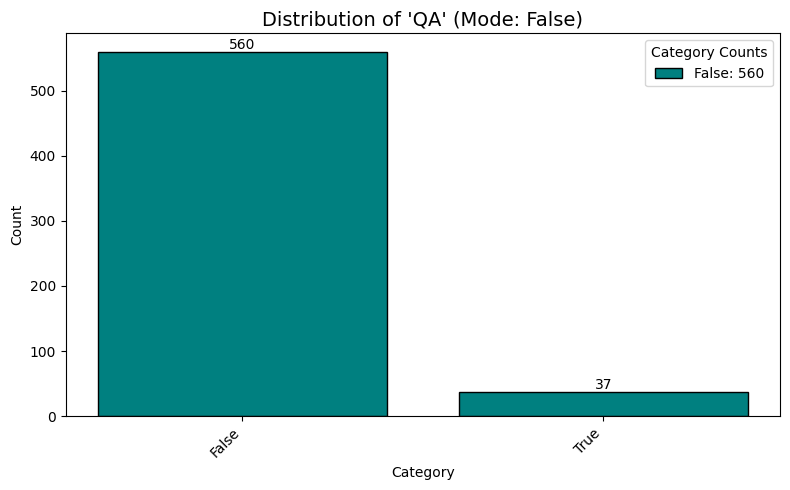

In [8]:
import os
from plots import plot_time_column, plot_categorical_column

directory = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2025-06-04"

error_file = PDStatistics_calculator().load(os.path.join(directory, "errors.pkl"))
errors_dataset = error_file.sample_attributes

error_types = ["No Error", "Uncentered Box", "Severely Uncentered Box", "Missed Target", "Blank Box", "Silt Transpose Error", "Occlusion [Edge or star]", "Other", "Unknown", "Long Satellite Streak"]
errors_dataset['error_type_str'] = errors_dataset.apply(lambda row: error_types[row['error_type']] if row["error_type"] < len(error_types) else error_types[8], axis=1)

print(errors_dataset.columns)

summarize_categorical_columns(errors_dataset, ["QA", "error_type_str", "created"])
plot_categorical_column(errors_dataset["error_type_str"])
plot_categorical_column(errors_dataset["num_objects"])
plot_categorical_column(errors_dataset["created"])
plot_categorical_column(errors_dataset["updated"])
plot_categorical_column(errors_dataset["QA"])

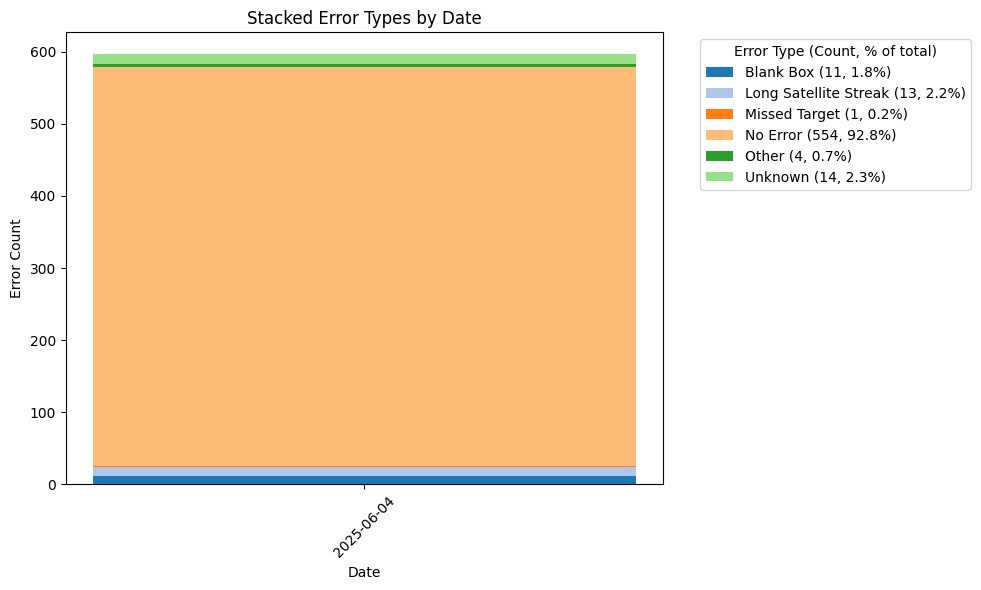

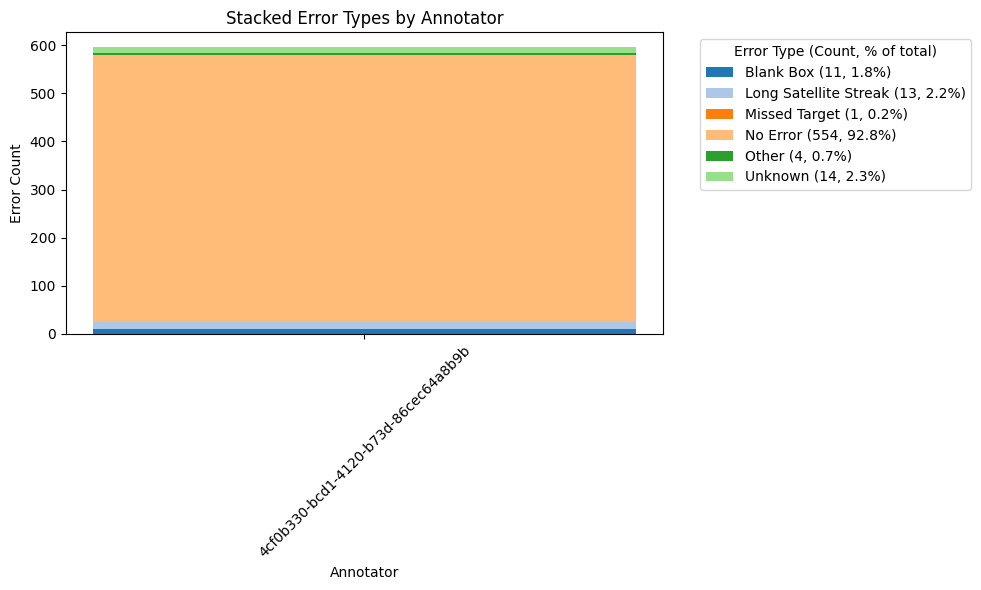

In [9]:
# Plot
plot_stacked_errors_with_percent_legend(errors_dataset)
plot_stacked_errors_with_percent_legend_by_annotator_id(errors_dataset)
